In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("pasha_mouse_shop.db")

In [3]:
query_popular_product = """
SELECT
    p.product_name,
    SUM(s.quantity) AS total_quantity_sold
FROM
    sales s
JOIN
    products p ON s.product_id = p.product_id
GROUP BY
    p.product_name
ORDER BY
    total_quantity_sold DESC
"""

In [4]:
df_sales_by_product = pd.read_sql(query_popular_product, conn)
display(df_sales_by_product)

,product_name,total_quantity_sold
0,SteelSeries Rival 3,449
1,Razer Viper Mini,416
2,Logitech G102,383
3,HyperX Pulsefire Haste,377
4,Zowie EC2,374


In [5]:
query_revenue = """
SELECT
    p.product_name,
    SUM(s.quantity * p.price) AS total_revenue
FROM
    sales s
JOIN
    products p ON s.product_id = p.product_id
GROUP BY 
    p.product_name
ORDER BY
    total_revenue DESC
"""

In [6]:
df_revenue = pd.read_sql(query_revenue, conn)
display(df_revenue)

,product_name,total_revenue
0,Zowie EC2,26180
1,HyperX Pulsefire Haste,18850
2,Razer Viper Mini,16640
3,SteelSeries Rival 3,13470
4,Logitech G102,9575


In [7]:
query_sales_geography = """
SELECT
    p.product_name, s.city,
    SUM(s.quantity) AS total_quantity_sold
FROM
    sales s
JOIN
    products p ON s.product_id = p.product_id
GROUP BY
    p.product_name, s.city
ORDER BY
    s.city, total_quantity_sold DESC
"""

In [8]:
df_sales_geography = pd.read_sql(query_sales_geography, conn)
display(df_sales_geography)

,product_name,city,total_quantity_sold
0,SteelSeries Rival 3,Казань,112
1,Logitech G102,Казань,98
2,HyperX Pulsefire Haste,Казань,87
3,Razer Viper Mini,Казань,86
4,Zowie EC2,Казань,58
5,Razer Viper Mini,Москва,86
6,Zowie EC2,Москва,85
7,Logitech G102,Москва,81
8,SteelSeries Rival 3,Москва,76
9,HyperX Pulsefire Haste,Москва,75


In [9]:
query_numeric_vip = """
SELECT
    customer_id,
    COUNT(sale_id) AS number_of_orders
FROM 
    sales s
GROUP BY
    customer_id
ORDER BY
    number_of_orders DESC
LIMIT 5
"""

In [10]:
df_query_numeric_vip = pd.read_sql(query_numeric_vip, conn)
display(df_query_numeric_vip)

,customer_id,number_of_orders
0,1022,10
1,1286,8
2,1209,8
3,1110,8
4,1290,7


In [11]:
query_revenue_vip = """
SELECT
    customer_id,
    SUM(s.quantity * p.price) AS total_revenue
FROM
    sales s
JOIN
    products p ON p.product_id = s.product_id
GROUP BY
    customer_id
ORDER BY
    total_revenue DESC
LIMIT 5
"""

In [12]:
df_query_revenue_vip = pd.read_sql(query_revenue_vip, conn)
display(df_query_revenue_vip)

,customer_id,total_revenue
0,1057,835
1,1291,780
2,1256,755
3,1022,745
4,1143,730


In [13]:
query_seasons_analysis = """
SELECT
    strftime('%Y-%m', date) AS sales_month,
    SUM(s.quantity * p.price) AS total_revenue
FROM
    sales s
JOIN
    products p ON p.product_id = s.product_id
GROUP BY
    sales_month
ORDER BY
    sales_month
"""

In [14]:
df_query_seasons_analysis = pd.read_sql(query_seasons_analysis, conn)
display(df_query_seasons_analysis)

,sales_month,total_revenue
0,2024-07,1645
1,2024-08,6950
2,2024-09,6885
3,2024-10,6885
4,2024-11,6780
5,2024-12,8680
6,2025-01,6675
7,2025-02,6880
8,2025-03,8200
9,2025-04,6685


In [15]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

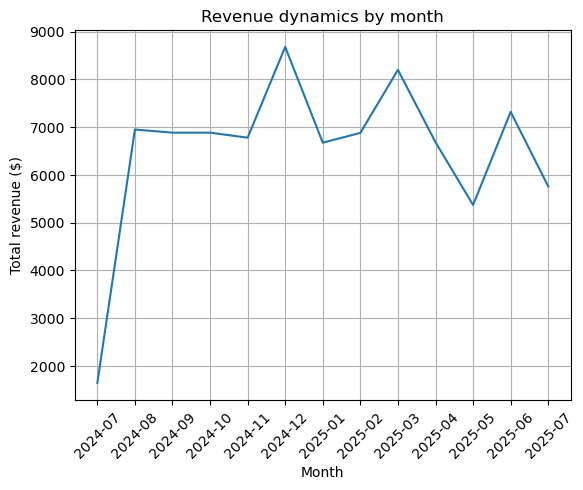

In [17]:
sns.lineplot(
    data=df_query_seasons_analysis,
    x="sales_month",
    y="total_revenue"
)
plt.title("Revenue dynamics by month")
plt.xlabel("Month")
plt.ylabel("Total revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()